# Imports

In [1]:
#!pip install catboost

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import catboost as cb

import matplotlib.pyplot as plt
import seaborn as sns

# Read diamonds

In [3]:
diamonds_train_sorted = pd.read_csv('../data/diamonds_train_sorted.csv')
diamonds_train_sorted.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.21,4,1,2,59.8,61.0,3.89,3.84,2.31
1,326,0.23,0,1,1,61.5,55.0,3.95,3.98,2.43
2,327,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,334,0.29,4,5,3,62.4,58.0,4.20,4.23,2.63
4,335,0.31,1,6,1,63.3,58.0,4.34,4.35,2.75


# Feature engineering

In [4]:
#diamonds_train_sorted['table_xy'] = (diamonds_train_sorted['table'].mean()*(diamonds_train_sorted['x']*diamonds_train_sorted['y']).mean()-diamonds_train_sorted['table']*(diamonds_train_sorted['x']*diamonds_train_sorted['y']))
#diamonds_train_sorted['depth_z'] = (diamonds_train_sorted['depth'].mean()*diamonds_train_sorted['z'].mean()-diamonds_train_sorted['depth']*diamonds_train_sorted['z'])
diamonds_train_sorted['volume'] = diamonds_train_sorted['x']*diamonds_train_sorted['y']*diamonds_train_sorted['z']
#diamonds_train_sorted['super_feature'] = diamonds_train_sorted['carat'] / diamonds_train_sorted['table'] * diamonds_train_sorted['depth']
diamonds_train_sorted['super_feature'] = (2*diamonds_train_sorted['z'])/(diamonds_train_sorted['x']+diamonds_train_sorted['y'])
diamonds_train_sorted.head()

,price,carat,cut,color,clarity,depth,table,x,y,z,volume,super_feature
0,326,0.21,4,1,2,59.8,61.0,3.89,3.84,2.31,34.505856,0.597671
1,326,0.23,0,1,1,61.5,55.0,3.95,3.98,2.43,38.202030,0.612863
2,327,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,38.076885,0.568966
3,334,0.29,4,5,3,62.4,58.0,4.20,4.23,2.63,46.724580,0.623962
4,335,0.31,1,6,1,63.3,58.0,4.34,4.35,2.75,51.917250,0.632911


<Axes: >

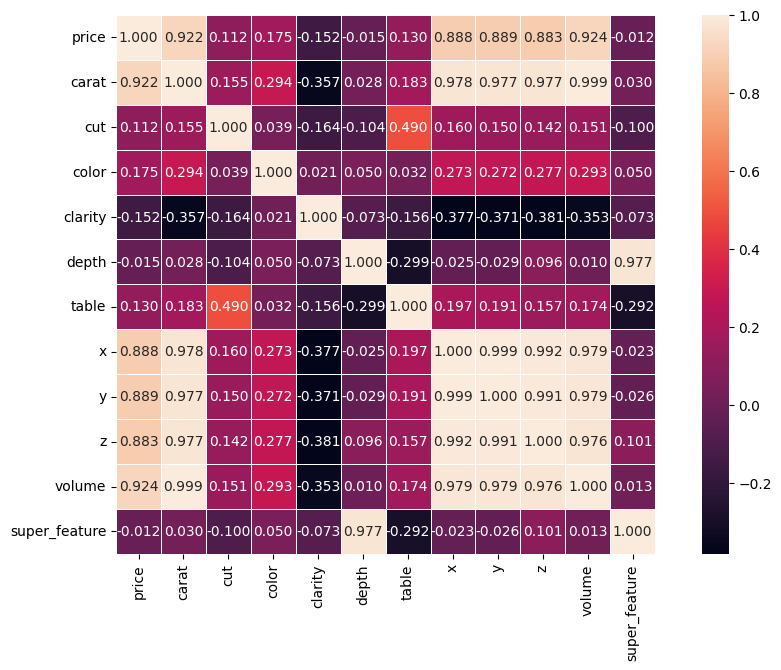

In [5]:
plt.subplots(figsize = (12, 7))
corr = diamonds_train_sorted.corr()
sns.heatmap(data = corr, annot = True, fmt = ".3f", cbar = True, linewidth = .5, 
            annot_kws = {'fontsize':10, 'fontweight':'regular'}, square = True)

# Model train split

In [6]:
X = diamonds_train_sorted[['carat',
                           'cut',
                           'color', 
                           'clarity', 
                           'table',
                          'volume',
                          'super_feature']]

y = diamonds_train_sorted['price']

In [7]:
# Train + test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

X_train: (32344, 7), X_test: (8087, 7), y_train: (32344,), y_test: (8087,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


# Train model RandomForestRegressor

In [8]:
# rf model train
regressor = RandomForestRegressor()
hyperparameters = regressor.get_params()
regressor.fit(X_train, y_train)

RandomForestRegressor()

# Predict model

In [9]:
# rf model predict
y_pred = regressor.predict(X_test)

# RMSE calculation

In [10]:
# RMSE calculation
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

537.5640902806426

# Model train 100 %

In [11]:
# rf model train
regressor = RandomForestRegressor()
hyperparameters = regressor.get_params()
regressor.fit(X, y)

RandomForestRegressor()

In [12]:
"""
model = cb.CatBoostRegressor(loss_function='RMSE')
"""

"\nmodel = cb.CatBoostRegressor(loss_function='RMSE')\n"

In [13]:
"""
# rf model train
grid_b = {'iterations': [100, 150, 500],
        'learning_rate': [0.03, 0.1, 0.3],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid_b, train_dataset_100)
"""

"\n# rf model train\ngrid_b = {'iterations': [100, 150, 500],\n        'learning_rate': [0.03, 0.1, 0.3],\n        'depth': [2, 4, 6, 8],\n        'l2_leaf_reg': [0.2, 0.5, 1, 3]}\nmodel.grid_search(grid_b, train_dataset_100)\n"

# Read diamonds_test_processed

In [14]:
# Read diamonds_test_processed
diamonds_test_basic = pd.read_csv('../data/diamonds_test_processed.csv')
diamonds_test_basic.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.79,3,2,2,62.7,60.0,5.82,5.89,3.67
1,1.20,0,6,4,61.0,57.0,6.81,6.89,4.18
2,1.57,4,4,2,62.2,61.0,7.38,7.32,4.57
3,0.90,3,2,2,63.8,54.0,6.09,6.13,3.90
4,0.50,3,2,4,62.9,58.0,5.05,5.09,3.19


# Feature engineering

In [15]:
#diamonds_test_basic['table_xy'] = (diamonds_test_basic['table'].mean()*(diamonds_test_basic['x']*diamonds_test_basic['y']).mean()-diamonds_test_basic['table']*(diamonds_test_basic['x']*diamonds_test_basic['y']))
#diamonds_test_basic['depth_z'] = (diamonds_test_basic['depth'].mean()*diamonds_test_basic['z'].mean()-diamonds_test_basic['depth']*diamonds_test_basic['z'])
diamonds_test_basic['volume'] = diamonds_test_basic['x']*diamonds_test_basic['y']*diamonds_test_basic['z']
#diamonds_test_basic['super_feature'] = diamonds_test_basic['carat'] / diamonds_test_basic['table'] * diamonds_test_basic['depth']
diamonds_test_basic['super_feature'] = (2*diamonds_test_basic['z'])/(diamonds_test_basic['x']+diamonds_test_basic['y'])
diamonds_test_basic.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume,super_feature
0,0.79,3,2,2,62.7,60.0,5.82,5.89,3.67,125.806866,0.626815
1,1.20,0,6,4,61.0,57.0,6.81,6.89,4.18,196.129362,0.610219
2,1.57,4,4,2,62.2,61.0,7.38,7.32,4.57,246.878712,0.621769
3,0.90,3,2,2,63.8,54.0,6.09,6.13,3.90,145.593630,0.638298
4,0.50,3,2,4,62.9,58.0,5.05,5.09,3.19,81.997355,0.629191


In [19]:
#print(list(diamonds_test_basic['super_feature']))

# Predict diamonds_test_basic

In [17]:
# Define fearures
X_dtfe_2 = diamonds_test_basic[['carat',
                           'cut',
                           'color', 
                           'clarity', 
                           'table',
                          'volume',
                          'super_feature']]

In [18]:
# predict
y_predfe_2 = regressor.predict(X_dtfe_2)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Create sample_submission

In [ ]:
predictions_fe_2 = pd.DataFrame(y_predfe_2).rename(columns = {0:'price'})
predictions_fe_2.index.names = ['id']
predictions_fe_2

In [ ]:
predictions_fe_2.to_csv('../predictions/predictions_RandomForest.csv')